In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import cv2
import os
import matplotlib.pyplot as plt
# Define image size
SIZE = 64  # Example size, can be adjusted

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (SIZE, SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0  # Normalization
    return img

In [ ]:
# Assuming data is stored in a directory structure: /dataset/class_1, /dataset/class_2, etc.
data_dir = "/content/drive/MyDrive/IOT project/object detection-20231212T094554Z-001/datasets"  # Update with your dataset path

In [ ]:
# Use ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # Use 20% of the data for validation

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(SIZE, SIZE),
    batch_size=8,
    class_mode='categorical',
    subset='training')  # Set as training data


Found 320 images belonging to 4 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(SIZE, SIZE),
    batch_size=8,
    class_mode='categorical',
    subset='validation')  # Set as validation data

Found 79 images belonging to 4 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flattening and Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))  # Number of classes

# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20)  # Number of epochs can be changed


Epoch 1/20
40/40 [==============================] - ETA: 0s - loss: 1.3839 - accuracy: 0.2531

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (117504000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


40/40 [==============================] - 186s 5s/step - loss: 1.3839 - accuracy: 0.2531 - val_loss: 1.3066 - val_accuracy: 0.4444
Epoch 2/20
40/40 [==============================] - 108s 3s/step - loss: 1.3111 - accuracy: 0.4281 - val_loss: 1.2351 - val_accuracy: 0.5278
Epoch 3/20
40/40 [==============================] - 84s 2s/step - loss: 1.2385 - accuracy: 0.4469 - val_loss: 1.1814 - val_accuracy: 0.5000
Epoch 4/20
40/40 [==============================] - 80s 2s/step - loss: 1.2331 - accuracy: 0.4781 - val_loss: 1.1819 - val_accuracy: 0.5139
Epoch 5/20
40/40 [==============================] - 99s 3s/step - loss: 1.1706 - accuracy: 0.5063 - val_loss: 1.0941 - val_accuracy: 0.5139
Epoch 6/20
40/40 [==============================] - 80s 2s/step - loss: 1.1501 - accuracy: 0.5281 - val_loss: 1.0462 - val_accuracy: 0.5417
Epoch 7/20
40/40 [==============================] - 105s 3s/step - loss: 1.1922 - accuracy: 0.4656 - val_loss: 1.2210 - val_accuracy: 0.4306
Epoch 8/20
40/40 [==========

In [ ]:
model.save('gesture_recognition_model.h5')  # Saving the model for future use

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


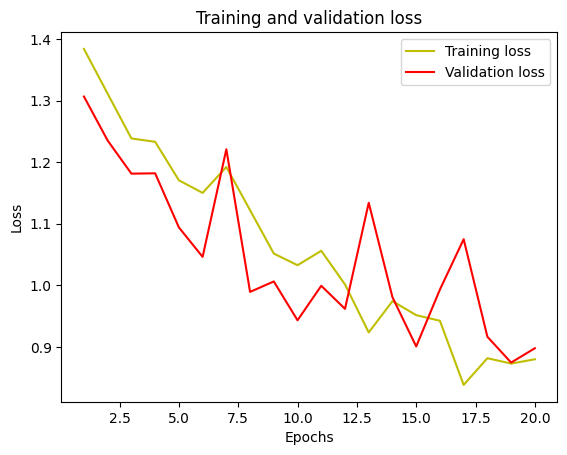

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

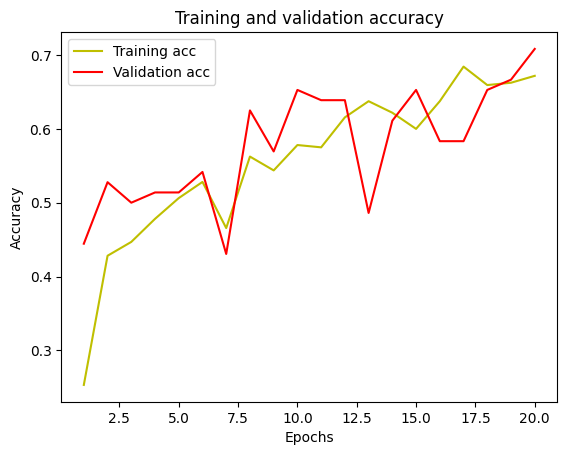

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(validation_generator, steps=validation_generator.samples)

10/79 [==>...........................] - ETA: 2:49

79/79 [==============================] - 24s 284ms/step


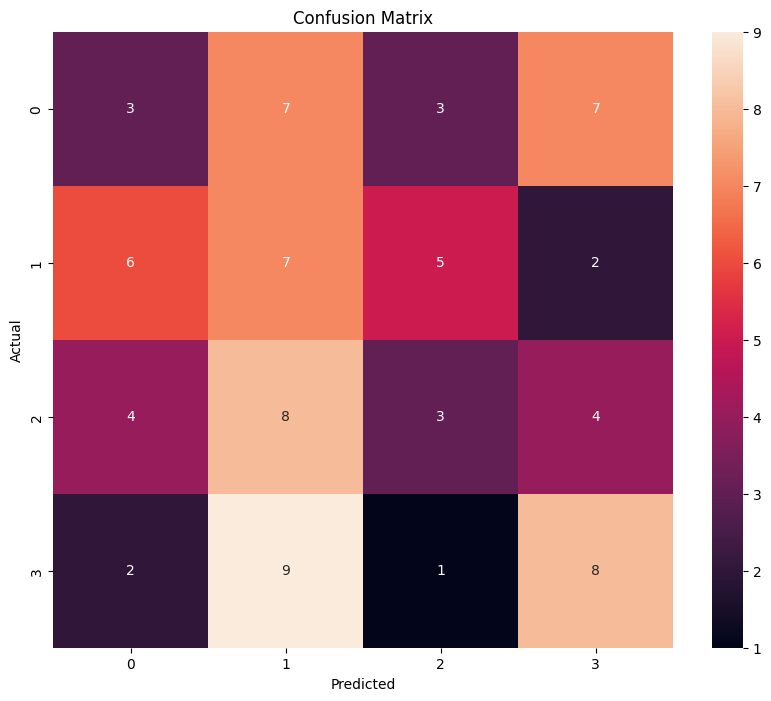

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Get the true labels
true_classes = validation_generator.classes

# Convert predictions to label indices
predicted_classes = np.argmax(predictions, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plotting the confusion matrix
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from keras.models import load_model

# Load the trained model
model = load_model('gesture_recognition_model.h5')

import tensorflow as tf

# Convert the model to the TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to a file
with open('object_recognition_model.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

In [ ]:
num_classes = train_generator.num_classes
true_labels = label_binarize(validation_generator.classes, classes=range(num_classes))
predicted_scores = model.predict(validation_generator, steps=validation_generator.samples)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], predicted_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

 1/79 [..............................] - ETA: 4:02

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (117504000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


10/79 [==>...........................] - ETA: 2:47

79/79 [==============================] - 25s 280ms/step


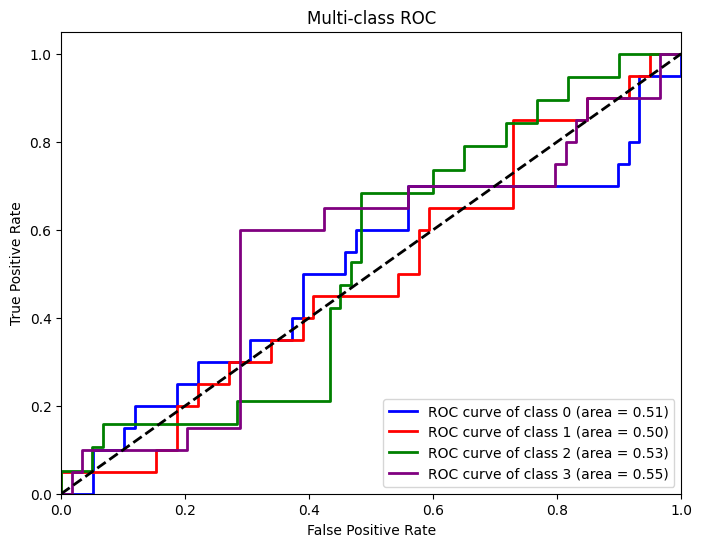

In [ ]:
# Setup plot details
colors = cycle(['blue', 'red', 'green', 'purple'])
lw = 2

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Convert predictions to label indices for comparison
predicted_classes = np.argmax(predicted_scores, axis=1)

# Calculate classification report
report = classification_report(validation_generator.classes, predicted_classes, target_names=validation_generator.class_indices.keys())

print(report)

              precision    recall  f1-score   support

    keyboard       0.33      0.20      0.25        20
     monitor       0.26      0.45      0.33        20
       mouse       0.25      0.16      0.19        19
         pen       0.15      0.15      0.15        20

    accuracy                           0.24        79
   macro avg       0.25      0.24      0.23        79
weighted avg       0.25      0.24      0.23        79



In [ ]:
from keras.models import load_model

# Load the model
model = load_model('gesture_recognition_model.h5')

def preprocess_image(image_path, img_size):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (img_size, img_size))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0  # Normalization
    return img

# Preprocess the image
test_image = preprocess_image('/content/drive/MyDrive/IOT project/test/test_mouse.jpeg', SIZE)
test_image = np.expand_dims(test_image, axis=0)

# Make prediction
predictions = model.predict(test_image)

# Get the predicted class index and confidence score
predicted_class_index = np.argmax(predictions, axis=1)[0]
confidence_score = np.max(predictions)

# Normalize the confidence score to be between 0 and 1
confidence_percentage = confidence_score * 100

# Assuming class_labels list is already defined and matches the order of classes used during training
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

print(f"Predicted Class: {predicted_class_name}, Confidence Score: {confidence_percentage:.2f}%")

OSError: ignored

In [ ]:
import numpy as np

import tensorflow as tf

def representative_dataset_gen():
    for _ in range(100):  # Adjust the number of data points
        data = np.random.rand(1, SIZE, SIZE, 3)  # Replace with actual data shape
        yield [data.astype(np.float32)]

# Load the existing model
model = tf.keras.models.load_model('gesture_recognition_model.h5')

# Convert to a quantized model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8  # or tf.int8
converter.inference_output_type = tf.uint8  # or tf.int8

tflite_quantized_model = converter.convert()

# Save the quantized model
with open('gesture_recognition_model_quantized.tflite', 'wb') as f:
    f.write(tflite_quantized_model)

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/convert.py:953: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


In [ ]:
 import tensorflow as tf
 import numpy as np
 import cv2

 # Load the TFLite model and allocate tensors
 interpreter = tf.lite.Interpreter(model_path='object_recognition_model.tflite')
 interpreter.allocate_tensors()

 # Get input and output details
 input_details = interpreter.get_input_details()
 output_details = interpreter.get_output_details()


In [ ]:
 def preprocess_image(image_path, img_size):
     img = cv2.imread(image_path)
     img = cv2.resize(img, (img_size, img_size))
     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
     img = img / 255.0
     img = np.array(img, dtype=np.float32)

     if input_details[0]['dtype'] == np.uint8:
         scale, zero_point = input_details[0]['quantization']
         img = img / scale + zero_point
         img = np.array(img, dtype=np.uint8)
     return img

 test_image = preprocess_image('/content/drive/MyDrive/IOT project/test/tmonitor.jpeg', input_details[0]['shape'][1])
 test_image = np.expand_dims(test_image, axis=0)

 class_labels = list(train_generator.class_indices.keys())

 interpreter.set_tensor(input_details[0]['index'], test_image)
 interpreter.invoke()
 output_data = interpreter.get_tensor(output_details[0]['index'])

 # Dequantize the output if necessary
 if output_details[0]['dtype'] == np.uint8:
     scale, zero_point = output_details[0]['quantization']
     output_data = (output_data - zero_point) * scale

 predicted_class_index = np.argmax(output_data, axis=1)[0]
 confidence_score = np.max(output_data)

 # Normalize the confidence score to be between 0 and 1
 confidence_percentage = (confidence_score / np.sum(output_data))*100

 print(f"Predicted Class: {predicted_class_name}, Confidence Score: {confidence_percentage:.2f}%")

Predicted Class: pen, Confidence Score: 100.00%
